### import packages

In [1]:
import nltk
# nltk.download()

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
### word data 

### sna_summary_wiki = open('/Users/baselhussein/ci8371/sna_wiki_abstract.txt')
# sna_summary_wiki.read()
# sna_summary_wiki.seek(0)
# sna_summary_wiki_content = sna_summary_wiki.read()
# print(sna_summary_wiki_content)

### import PDF 

In [3]:
# !pip install PyPDF2

In [7]:
import PyPDF2

sna_wiki_full = open('/Users/baselhussein/Projects/ci8371/sna_wiki_full.pdf',mode='rb')

In [8]:
pdf_reader = PyPDF2.PdfFileReader(sna_wiki_full)

In [9]:
pdf = pdf_reader.getPage(0)

In [10]:
sna_full_wiki_content = pdf.extractText()

In [11]:
sna_full_wiki_content

'Privacy policy\nAbout Wikipedia\nDisclaimers\nContact Wikipedia\nMobile view\nDevelopers\nStatistics\nCookie statement\nSocial network analysis\nThis page was last edited on 25 April 2021, at 10:52\n (UTC)\n.Text is available under the \nCreative Commons Attribution-ShareAlike License\n; additional terms may apply. \nBy using this site, you agree to the \nTerms\nof Use\n and Privacy Policy\n. Wikipedia¨ is a registered trademark of the \nWikimedia Foundation, Inc.\n, a non-proÞt organization.\n[show\n]V á T á E[show\n][hide][show\n][show\n][show\n]Part of a series on\nSociology\nHistory\n á Outline\n á IndexMethods\nSubÞelds\nCriminology\n á Critical theory\n á Culture\n áDemography\n á Development\n á Deviance\n áEconomic\n á Education\n á Environmental\n á Family\ná Feminist\n á Gender á Health á Immigration\n áIndustrial\n á Knowledge\n á Law á Literature\n áMedical\n á Military\n á Organizational\n á Political\n áRace and ethnicity\n á Religion á Rural\n á Science\n áSocial moveme

### clean text 

In [12]:
nltk_tokens = nltk.word_tokenize(sna_full_wiki_content)

print(list(nltk.bigrams(nltk_tokens)))

[('Privacy', 'policy'), ('policy', 'About'), ('About', 'Wikipedia'), ('Wikipedia', 'Disclaimers'), ('Disclaimers', 'Contact'), ('Contact', 'Wikipedia'), ('Wikipedia', 'Mobile'), ('Mobile', 'view'), ('view', 'Developers'), ('Developers', 'Statistics'), ('Statistics', 'Cookie'), ('Cookie', 'statement'), ('statement', 'Social'), ('Social', 'network'), ('network', 'analysis'), ('analysis', 'This'), ('This', 'page'), ('page', 'was'), ('was', 'last'), ('last', 'edited'), ('edited', 'on'), ('on', '25'), ('25', 'April'), ('April', '2021'), ('2021', ','), (',', 'at'), ('at', '10:52'), ('10:52', '('), ('(', 'UTC'), ('UTC', ')'), (')', '.Text'), ('.Text', 'is'), ('is', 'available'), ('available', 'under'), ('under', 'the'), ('the', 'Creative'), ('Creative', 'Commons'), ('Commons', 'Attribution-ShareAlike'), ('Attribution-ShareAlike', 'License'), ('License', ';'), (';', 'additional'), ('additional', 'terms'), ('terms', 'may'), ('may', 'apply'), ('apply', '.'), ('.', 'By'), ('By', 'using'), ('using

### add stopwords 

In [13]:
all_stopwords = stopwords.words('english')
all_stopwords.append('á')
all_stopwords.append('social')
all_stopwords.append('network')
all_stopwords.append('Social')
all_stopwords.append('Network')
all_stopwords.append('The')
all_stopwords.append('et')
all_stopwords.append('al')
all_stopwords.append('b')
all_stopwords.append('c')
all_stopwords.append('B')
all_stopwords.append('C')
all_stopwords.append('T')
all_stopwords.append('V')
all_stopwords.append('For')

In [14]:
nltk_token_rm_sw = [word for word in nltk_tokens if not word in all_stopwords]


print(nltk_token_rm_sw)

['Privacy', 'policy', 'About', 'Wikipedia', 'Disclaimers', 'Contact', 'Wikipedia', 'Mobile', 'view', 'Developers', 'Statistics', 'Cookie', 'statement', 'analysis', 'This', 'page', 'last', 'edited', '25', 'April', '2021', ',', '10:52', '(', 'UTC', ')', '.Text', 'available', 'Creative', 'Commons', 'Attribution-ShareAlike', 'License', ';', 'additional', 'terms', 'may', 'apply', '.', 'By', 'using', 'site', ',', 'agree', 'Terms', 'Use', 'Privacy', 'Policy', '.', 'Wikipedia¨', 'registered', 'trademark', 'Wikimedia', 'Foundation', ',', 'Inc.', ',', 'non-proÞt', 'organization', '.', '[', 'show', ']', 'E', '[', 'show', ']', '[', 'hide', ']', '[', 'show', ']', '[', 'show', ']', '[', 'show', ']', 'Part', 'series', 'Sociology', 'History', 'Outline', 'IndexMethods', 'SubÞelds', 'Criminology', 'Critical', 'theory', 'Culture', 'áDemography', 'Development', 'Deviance', 'áEconomic', 'Education', 'Environmental', 'Family', 'Feminist', 'Gender', 'Health', 'Immigration', 'áIndustrial', 'Knowledge', 'Law',

### tokenize

In [15]:
nltk_token_rm_all = [word for word in nltk_token_rm_sw if word.isalnum()]

print(nltk_token_rm_all)

['Privacy', 'policy', 'About', 'Wikipedia', 'Disclaimers', 'Contact', 'Wikipedia', 'Mobile', 'view', 'Developers', 'Statistics', 'Cookie', 'statement', 'analysis', 'This', 'page', 'last', 'edited', '25', 'April', '2021', 'UTC', 'available', 'Creative', 'Commons', 'License', 'additional', 'terms', 'may', 'apply', 'By', 'using', 'site', 'agree', 'Terms', 'Use', 'Privacy', 'Policy', 'registered', 'trademark', 'Wikimedia', 'Foundation', 'organization', 'show', 'E', 'show', 'hide', 'show', 'show', 'show', 'Part', 'series', 'Sociology', 'History', 'Outline', 'IndexMethods', 'SubÞelds', 'Criminology', 'Critical', 'theory', 'Culture', 'áDemography', 'Development', 'Deviance', 'áEconomic', 'Education', 'Environmental', 'Family', 'Feminist', 'Gender', 'Health', 'Immigration', 'áIndustrial', 'Knowledge', 'Law', 'Literature', 'áMedical', 'Military', 'Organizational', 'Political', 'áRace', 'ethnicity', 'Religion', 'Rural', 'Science', 'áSocial', 'movements', 'psychology', 'áSymbolic', 'interactionis

### bigrams

In [16]:
terms_bigram = [list(nltk.bigrams(nltk_token_rm_all))]

In [17]:
# Flatten list of bigrams
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)


[(('collaborative', 'learning'), 9),
 (('two', 'actors'), 5),
 (('applications', 'edit'), 5),
 (('networking', 'potential'), 4),
 (('edit', 'analysis'), 4),
 (('analysis', 'study'), 4),
 (('Retrieved', '19'), 4),
 (('common', 'third'), 3),
 (('media', 'analytics'), 3),
 (('analysis', 'applications'), 3),
 (('weak', 'ties'), 3),
 (('positive', 'relationship'), 3),
 (('negative', 'relationship'), 3),
 (('research', 'studies'), 3),
 (('analysis', 'used'), 3),
 (('Complex', 'Networks'), 3),
 (('ISSN', 'OCLC'), 3),
 (('American', 'Journal'), 3),
 (('19', 'July'), 3),
 (('About', 'Wikipedia'), 2)]

In [18]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

In [19]:
d = bigram_df.set_index('bigram').T.to_dict('records')

### Create network plot 

In [20]:
import networkx as nx
G = nx.Graph()

In [21]:
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


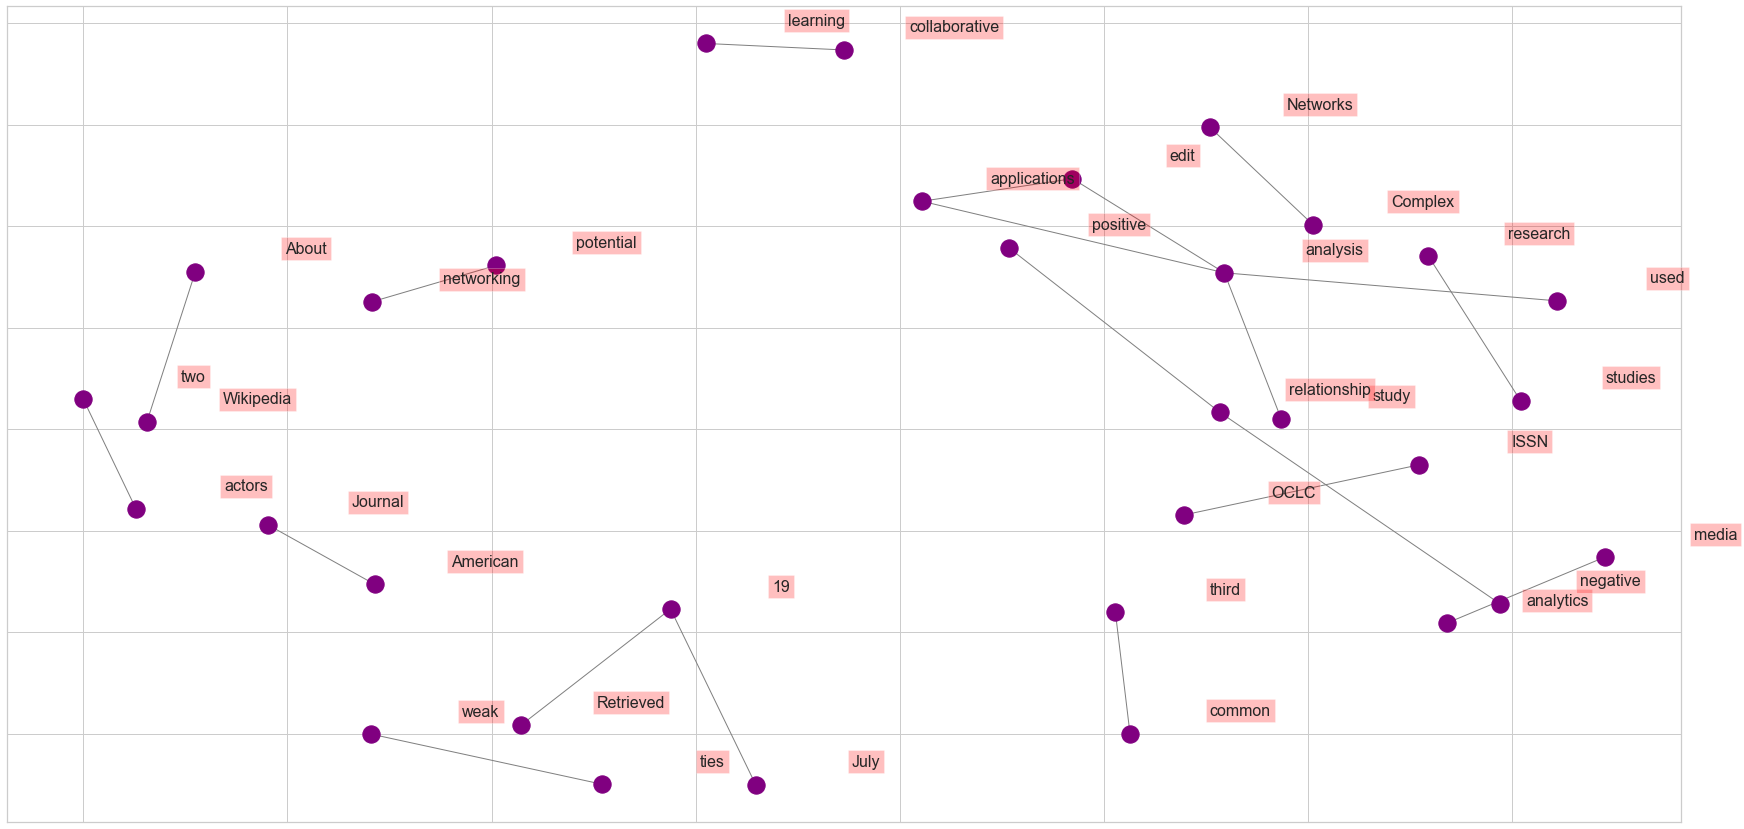

In [22]:
fig, ax = plt.subplots(figsize=(30, 15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=1,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=16)
    
plt.show()